<a href="https://colab.research.google.com/github/ucheokechukwu/ml_tensorflow_deeplearning/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this video, we're going to learn how to write neural networks for classification problems.
Types of classifications: 
1. Binary classification.
2. Multiclass classification
3. Multilabel classification.

## Creating data to view and fit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.datasets import make_circles
# Make 1000 samples
n_samples = 1000
# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42) # random_state is like seed to make random reproducible

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

*Visualize... visualize... visualize...*

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0],
                        "X1": X[:,1],
                        "label":y})

In [ ]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


## Input and output shapes

In [ ]:
# Check the shapes of our features and labels:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Chek the length of our samples:
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels:
X[10],y[10]

(array([-0.64249042, -0.54409929]), 1)

In [ ]:
# Check the labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt


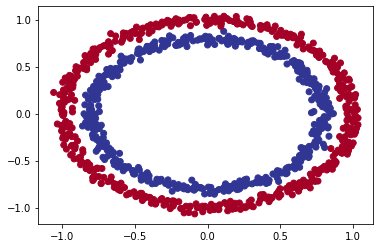

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X.shape

(1000, 2)

## Steps in modelling

In [ ]:
import tensorflow as tf

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
    # tf.keras.layers.input_shape([2]),
    # tf.keras.layers.Dense(100, activation=""),
    # td.keras.layers.Dense(3, name="output_layer", activation="sigmoid")
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics="accuracy")

# 3. Fit the modelling
model_1.fit(X,y, epochs=5)



# 4. Evaluate the model

# 5. Tweak the model

# 6. Evaluate, then tweak etc...

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 5.5407 - accuracy: 0.4820
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 5.5110 - accuracy: 0.4800
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 5.4767 - accuracy: 0.4800
Epoch 4/5
32/32 [==============================] - 0s 6ms/step - loss: 5.3390 - accuracy: 0.4820
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 5.1692 - accuracy: 0.4790


Let's try and improve our model by training it for longer...

* Trying to see if accuracy improves by adding an extra layer. (0.49 accuracy is basically a coin flip)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics="accuracy")

# 3 Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model

model_2.evaluate(X,y)

32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932512521743774, 0.5]

In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

from IPython.utils.io import unicode_std_stream
* Improving our model...

1. Create our model - add more layers or increase the number of hidden units
2. Compiling our model - using a different optimization funciton eg. Adam instead of SGD,
3. Fitting our model - let the model train for longer

In [ ]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 4s 8ms/step - loss: 3.2500 - accuracy: 0.4580
Epoch 2/100
32/32 [==============================] - 0s 9ms/step - loss: 0.8835 - accuracy: 0.4570
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7876 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7626 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7338 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7239 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7158 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7096 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7046 - accuracy: 0.5000
Epoch 11/

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934546828269958, 0.5]

* Observation: still getting 0.5 accuracy whichi is just as good as guessing.
Next strategy: lets try and visaulize 

In [ ]:
model_1.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 1)                 3         
                                                                 
 dense_56 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 100)               300       
                                                                 
 dense_58 (Dense)            (None, 10)                1010      
                                                                 
 dense_59 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.50758255],
       [0.49740732],
       [0.49743253],
       [0.50941634],
       [0.48505345],
       [0.50861716],
       [0.51364434],
       [0.5061446 ],
       [0.48341247],
       [0.5170279 ],
       [0.48525533],
       [0.5177788 ],
       [0.51355743],
       [0.4970942 ],
       [0.49165225],
       [0.48604456],
       [0.4872378 ],
       [0.48501813],
       [0.4923624 ],
       [0.4815605 ],
       [0.51086015],
       [0.5113962 ],
       [0.48054355],
       [0.5083601 ],
       [0.50210667],
       [0.49720952],
       [0.51862174],
       [0.5009302 ],
       [0.4862713 ],
       [0.49423036],
       [0.48053876],
       [0.51591104],
       [0.51340955],
       [0.50501114],
       [0.4788354 ],
       [0.5070283 ],
       [0.5061614 ],
       [0.5146693 ],
       [0.486816  ],
       [0.5150541 ],
       [0.481295  ],
       [0.5182784 ],
       [0.48235828],
       [0.49936348],
       [0.4834591 ],
       [0.48726243],
       [0.488513  ],
       [0.514

* Notice how all the predictions are around 0.5 and not closer to 0 or 1?
* Further visualization plotting...

  * Take in a trained model, features (X) and labels (y)
  * Create a meshgrid of the different X alues
  * Make predictions across the meshgrid
  * Plot the predictions and a line between zones where each unique class fails

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  '''
  Plots the decision borundary created by a model 
  predicting on X
  '''

  # Define the axis boundaries of the plot and create a mesh grid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+ 0.1 # adding and subtracting 0.1 for margins
  y_min, y_max = X[:,1].min() - 0.1, X[:,0].max()+ 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to predict with these)
  x_in =np.c_[xx.ravel(), yy.ravel()] # np.c_ used to stack 2D arrays

  # Make predictions
  y_pred = model.predict(x_in)

  # Check if we're working on a multi-class or a binary classification
  if len(y_pred[0])>1:
    print("Doing multiclass classification")
    # We have to reshape our predictions to get them ready
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
Doing binary classification


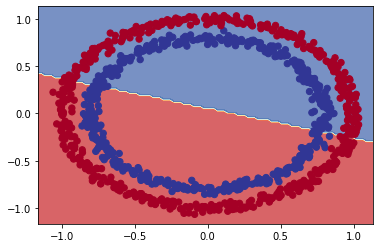

In [ ]:
## Check out the predictions our model is making...
plot_decision_boundary(model_3, X, y)

* Observation: Our model is not working because it's trying to fit a straight line through circle data...

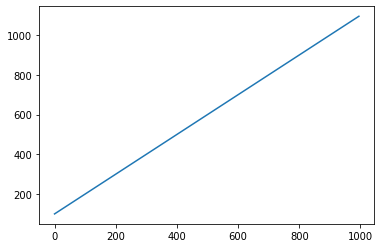

In [ ]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = x+100

plt.plot(X_regression, y_regression)

In [ ]:
# Split regression data into training and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data

# model_3.fit(X_reg_train, y_reg_train) # This won't work!

* Oh wait... we compiled our model for a Binary classification problem. But we're now working on a regression. Let's change the model to suit our data.

In [ ]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mean_absolute_error,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="mae")

history = model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 452.5848 - mae: 452.5848
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 331.3581 - mae: 331.3581
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 214.2112 - mae: 214.2112
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 92.0936 - mae: 92.0936
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 63.1223 - mae: 63.1223
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 91.2524 - mae: 91.2524
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 66.5442 - mae: 66.5442
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.9754 - mae: 43.9754
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 49.2025 - mae: 49.2025
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.6617 - mae: 41.6617
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 6ms/step


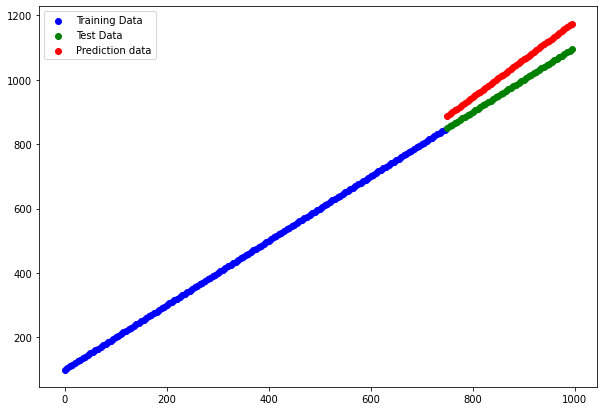

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our groundtruth?

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Prediction data")
plt.legend()

### The missing piece: non-linearity

In [ ]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear", input_shape=[2])
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")
model_5.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear, input_shape=[2])
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")
model_6.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3216 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3113 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3081 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3045 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3070 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3063 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3063 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3063 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3062 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3062 - accuracy: 0.4850
Epoch 11/

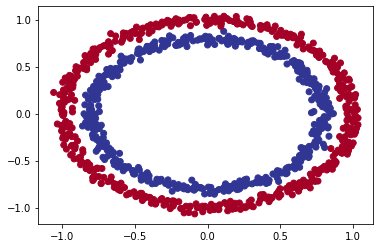

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:711: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:711: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


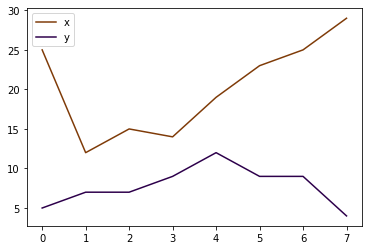

In [ ]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'x': [25, 12, 15, 14, 19, 23, 25, 29],
                   'y': [5, 7, 7, 9, 12, 9, 9, 4],
                   'z': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C']})

df.plot(c=df.z, cmap=plt.cm.PuOr);

313/313 [==============================] - 0s 1ms/step
Doing binary classification


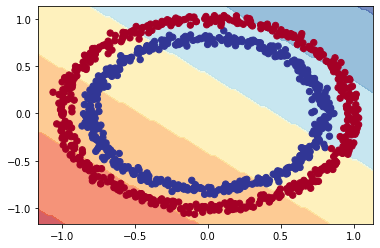

In [ ]:
# Check the decision boundary of model_5
plot_decision_boundary(model = model_6, X=X, y=y)

In [ ]:
# Let's try to build our first neural network with non-linear activation function.
# Trying activation - relu

In [ ]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "relu")
])
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="mae")
history=model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.1212 - mae: 0.5670
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0997 - mae: 0.5637
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0627 - mae: 0.5612
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0400 - mae: 0.5597
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0159 - mae: 0.5578
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9926 - mae: 0.5556
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9880 - mae: 0.5549
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9864 - mae: 0.5542
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 5.9842 - mae: 0.5541
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9828 - mae: 0.5536
Epoch 11/100
32/32 [==============================] - 0s 3m

313/313 [==============================] - 1s 1ms/step
Doing binary classification


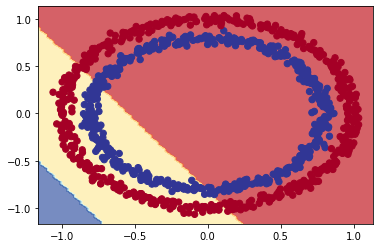

In [ ]:
# Check the decision boundary of model_7
plot_decision_boundary(model = model_7, X=X, y=y)

In [ ]:
# Replicating multi-layer neural network

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics="accuracy")

history = model_8.fit(X,y,epochs=300)

Epoch 1/300
32/32 [==============================] - 1s 2ms/step - loss: 3.4119 - accuracy: 0.2390
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 2.8393 - accuracy: 0.2350
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 2.7389 - accuracy: 0.2390
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 2.6191 - accuracy: 0.2380
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 2.5465 - accuracy: 0.2350
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 2.4918 - accuracy: 0.2360
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 2.3752 - accuracy: 0.2320
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 2.0185 - accuracy: 0.2330
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 1.6501 - accuracy: 0.2310
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 1.5046 - accuracy: 0.2530
Epoch 11/

313/313 [==============================] - 1s 1ms/step
Doing multiclass classification


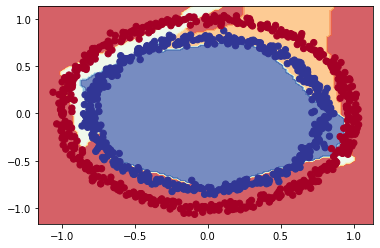

In [ ]:
# Check the decision boundary of model_8
plot_decision_boundary(model = model_8, X=X, y=y)

* Note: we have not put an activation on the output layer

In [ ]:
tf.random.set_seed(42)

model_9= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") # this is the output layer. 1 output for a binary classification

])

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")



In [ ]:
model_9.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.6980 - accuracy: 0.4950
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4980
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4970
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4950
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5100
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6918 - accuracy: 0.5070
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5050
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5170
Epoch 11/

313/313 [==============================] - 1s 4ms/step
Doing binary classification


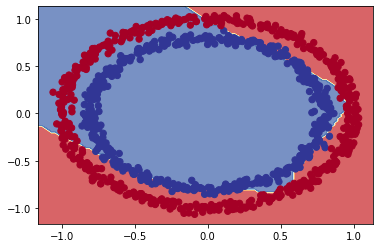

In [ ]:
# Check the decision boundary of model_9
plot_decision_boundary(model = model_9, X=X, y=y)

**Note**: The combination of linear and non-linear functions is how neural networks works.
 

In [ ]:
# We will create a toy tensor A to explore the activation function sigmoid
A = tf.cast(tf.range(-10,10), tf.float32)

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

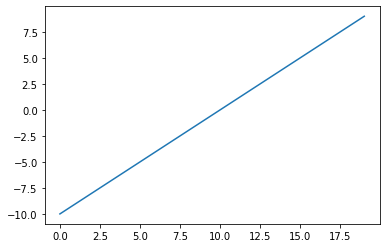

In [ ]:
plt.plot(A)

### Exploring the non-linear activation function.  

#### `sigmoid` 
Let's start by replicating sigmoid where sigmoid(x) = 1/(1+exp(-x))

In [ ]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))

In [ ]:
# Use the sigmoid on our toy tensor and plot it:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

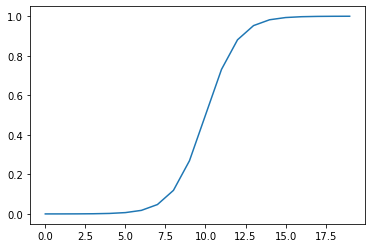

In [ ]:
plt.plot(sigmoid(A))

#### `relu` activation function

In [ ]:
def relu(x):
  return tf.maximum(0,x)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

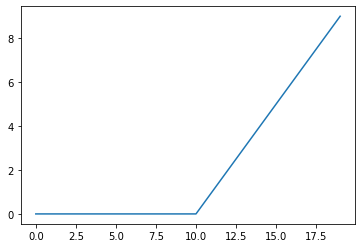

In [ ]:
plt.plot(relu(A))

#### `linear` activation function:
It returns the input *unmodified*! 😮

In [ ]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

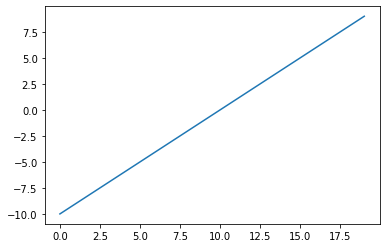

In [ ]:
# does it really not change anything?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

* This completely explains why the model couldn't learn any patterns in the non-linear data because the activation function was linear. 

## Evaluating and Improving our Classification Models

So far we've been training and testing on the same dataset which is WRONG!

In [ ]:
# Check how many samples we have:
len(X), len(y)

(1000, 1000)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

In [ ]:
y_train.shape, y_test.shape

((800,), (200,))

In [ ]:
# Let's recreate the model to fit on the training data and evaluate on the test data

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics="accuracy")



In [ ]:
history = model_10.fit(X_train, y_train, epochs=25) 

Epoch 1/25
25/25 [==============================] - 2s 5ms/step - loss: 0.6857 - accuracy: 0.5300
Epoch 2/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6829 - accuracy: 0.5350
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6753 - accuracy: 0.5688
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.6275
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6575 - accuracy: 0.6087
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.6250
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6338 - accuracy: 0.6288
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6131 - accuracy: 0.7163
Epoch 9/25
25/25 [==============================] - 0s 7ms/step - loss: 0.5890 - accuracy: 0.7150
Epoch 10/25
25/25 [==============================] - 0s 9ms/step - loss: 0.5680 - accuracy: 0.7362
Epoch 11/25
25/25 [

In [ ]:
# Evaluate the model on the test data set
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1770 - accuracy: 0.9750


[0.1770046353340149, 0.9750000238418579]

313/313 [==============================] - 1s 4ms/step
Doing binary classification
313/313 [==============================] - 1s 4ms/step
Doing binary classification


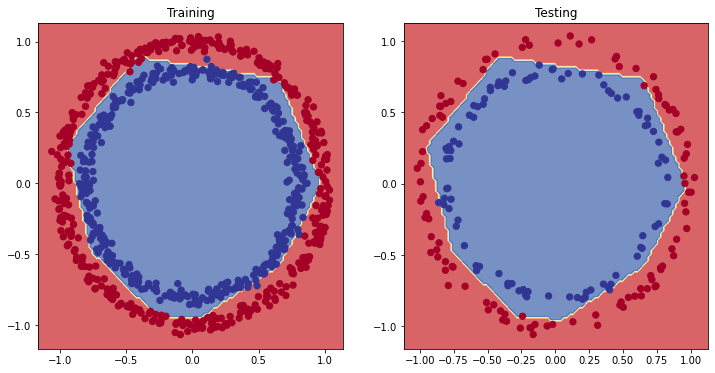

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model = model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Testing")
plot_decision_boundary(model = model_10, X=X_test, y=y_test)

### Plot the loss curves
* Why? *visualize visualize VISUALIZE!*

In [ ]:
history.history

{'loss': [0.6856675148010254,
  0.6828920841217041,
  0.6753235459327698,
  0.6674826145172119,
  0.6575099229812622,
  0.6473648548126221,
  0.6337558627128601,
  0.6130915284156799,
  0.5889965295791626,
  0.5680432915687561,
  0.5459732413291931,
  0.5110882520675659,
  0.49067050218582153,
  0.4607478380203247,
  0.44660940766334534,
  0.4238009750843048,
  0.4079396426677704,
  0.39523589611053467,
  0.38477954268455505,
  0.37125760316848755,
  0.35563144087791443,
  0.3353487253189087,
  0.3174290955066681,
  0.3016006648540497,
  0.25440657138824463],
 'accuracy': [0.5299999713897705,
  0.5350000262260437,
  0.5687500238418579,
  0.6274999976158142,
  0.6087499856948853,
  0.625,
  0.6287500262260437,
  0.7162500023841858,
  0.7149999737739563,
  0.7362499833106995,
  0.7487499713897705,
  0.7887499928474426,
  0.8125,
  0.8174999952316284,
  0.8237500190734863,
  0.8274999856948853,
  0.8362500071525574,
  0.856249988079071,
  0.8550000190734863,
  0.8650000095367432,
  0.8575

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.685668,0.53000
1,0.682892,0.53500
2,0.675324,0.56875
3,0.667483,0.62750
4,0.657510,0.60875
5,0.647365,0.62500
6,0.633756,0.62875
7,0.613092,0.71625
8,0.588997,0.71500
9,0.568043,0.73625


Text(0.5, 1.0, 'Model 10 Loss Curves')

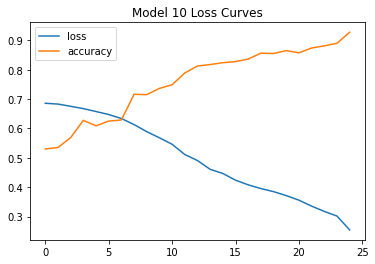

In [ ]:
history_10=history
pd.DataFrame(history.history).plot()
plt.title ("Model 10 Loss Curves")

* Note that for many problems, the loss function going down means the model is improving and predictions are approaching groundtruth labels.

### Find the best learning rate

To find the ideal learning rate i.e. the loss decreases the most during training, we will use the following steps:

1. Callback - an extra piece of functionality that we can add to the model while it's training. 
2. Another model 
3. A modified loss curve plot (from `history.history`)

In [ ]:
# Creating a new model

tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

# Callback has to exist before training...

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))
# Every epoch the learning rate is updated with this formula.


In [ ]:
history_11 = model_11.fit(X_train, y_train, epochs=100,
                          callbacks=[lr_scheduler]) #callbacks are lists

Epoch 1/100
25/25 [==============================] - 2s 8ms/step - loss: 0.7004 - accuracy: 0.5088 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.5088 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6999 - accuracy: 0.5075 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6997 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6995 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6992 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6990 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6986 - accuracy: 0.5050 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

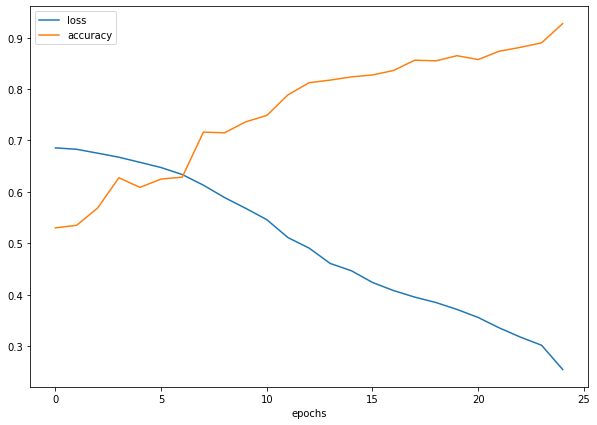

In [ ]:
pd.DataFrame(history_10.history).plot(figsize=(10,7), 
                                   xlabel="epochs") #remember to change it to a pandas dataframe first!

Text(0.5, 1.0, 'Model 11 Loss Curves')

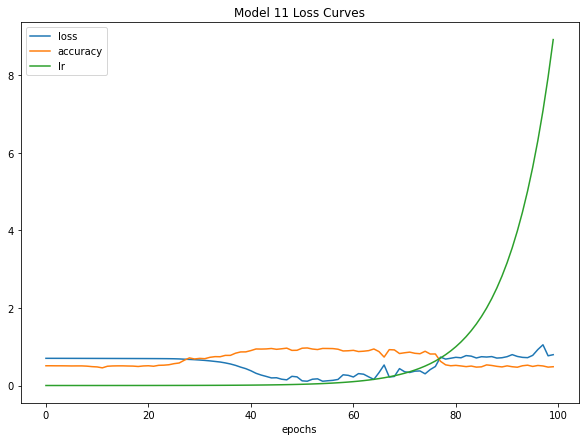

In [ ]:
pd.DataFrame(history_11.history).plot(figsize=(10,7), 
                                   xlabel="epochs")
plt.title ("Model 11 Loss Curves")

In [ ]:
# Plot the learning rate vs loss
lrs = 1e-4*(10**(tf.range(100)/20))
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs Loss')

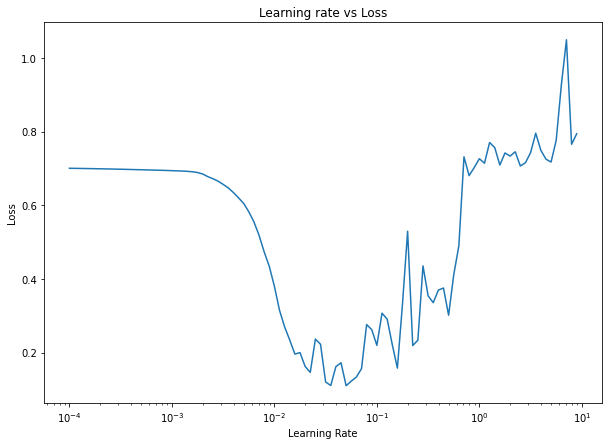

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_11.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

** Observation: The ideal learning rate is the point just before the lowest learning rate when the loss function gradient is still a sharp decline. So in this graph, it's somewhere between 10^-2 and 10^-1

In [ ]:
# Exampe of other typical learning rates values=
10**0, 10**-1, 10**-2, 10**3, 1e-4

(1, 0.1, 0.01, 1000, 0.0001)

In [ ]:
[a,b,c,d,e]=10**0, 10**-1, 10**-2, 10**3, 1e-4

In [ ]:
# Creating a new model with a more ideal learning rate
model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_12.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics="accuracy")



In [ ]:
history_12 = model_12.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.7012 - accuracy: 0.4812
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5813
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6618 - accuracy: 0.6338
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.6687
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7063
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5494 - accuracy: 0.7437
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7850
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8687
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.9162
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2770 - accuracy: 0.9450
Epoch 11/20
25/25 [

In [ ]:
# Evaluate models 12 and 10 on the test data

In [ ]:
model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9850


[0.07847179472446442, 0.9850000143051147]

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9750


[0.1770046353340149, 0.9750000238418579]

* `model_12` did better than `model_10` with less epochs

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


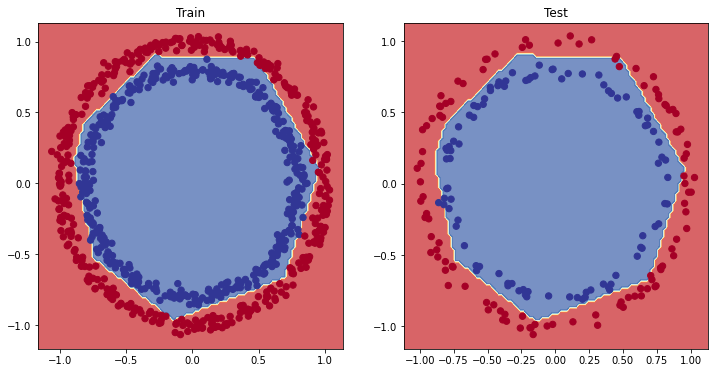

In [ ]:
# Plot decision boundaries for training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_12, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_12,X=X_test,y=y_test)

## More Classification Evaluation Methods
There are classification evaluation methods we should be familiar with:
* Accuracy
* Precision
* Recall
* F1 score
* Confusion matrix
* Classification report (from `sklearn`)

All have the same basic principal - what are the values the model predicted divided the values the model should have predicted

### Loss and Accuracy

In [ ]:

loss, accuracy = model_12.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9850
Model loss on the test set: 0.07847179472446442
Model accuracy on the test set: 98.50%


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = model_12.predict(X_test)
# confusion_matrix(y_test, y_preds) - This won't work.

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_preds[:10]

array([[9.3184328e-01],
       [9.5960069e-01],
       [9.9922079e-01],
       [9.4434935e-01],
       [3.3987791e-04],
       [9.8007303e-01],
       [1.0140748e-03],
       [8.5377336e-01],
       [9.9514729e-01],
       [2.2940958e-04]], dtype=float32)

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0])

* Note: looks like the predictions came out in **prediction probability** form, the standard output from the `sigmoid` or `softmax` activation function.
* For this to work, I need to round `y_preds` to the nearest integer with `tf.math.round` or `tf.round`

In [ ]:
tf.round(y_preds[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
confusion_matrix(y_test, tf.round(y_preds))

array([[105,   2],
       [  1,  92]])

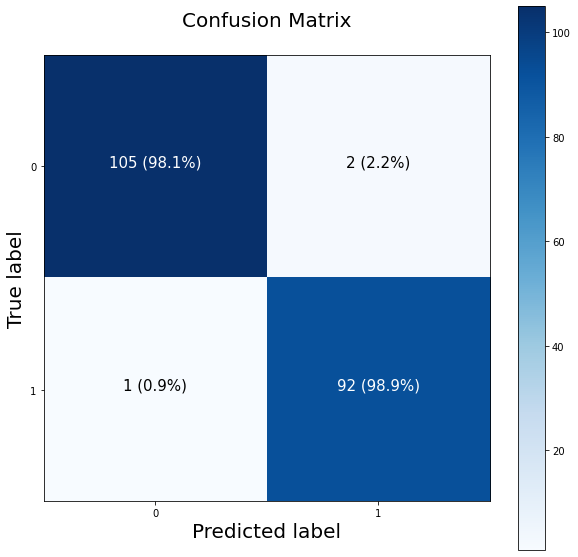

In [ ]:
# This can be cuter...


import itertools
figsize=(10,10)
# Create and normalize the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:np.newaxis] # normalizes the confusion matrix
n_classes = cm.shape[0] # counts the number of classes, this is binary so it's 2.

fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # matshow displays an array as a matrix in a new figure window
# plt.cm is plt.COLORMAP, not related to cm confusion matrix
fig.colorbar(cax)

# Create classes
classes = False

# The labels are a range of the confusion matrix shape, in this case 2 because it's binary
# If there were a list of classes, the labels would be each class
if classes:
  labels = classes
else: 
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis label to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min())/2

# Plot text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15
           )


In [ ]:
cm_norm

array([[0.98130841, 0.02150538],
       [0.00934579, 0.98924731]])

In [ ]:
cm.shape[0]

2

In [ ]:
# What does itertools.product do? Combines two things into each combination
import itertools
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  print(i, j)

0 0
0 1
1 0
1 1


In [ ]:
# Trying to turn this into a function...

def plot_confusion_matrix (y_true, y_predicted):
  '''
  Plots the confusion matrix into a color-coded graph form
  '''
  import itertools
  figsize=(10,10)
  # Create and normalize the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:np.newaxis] # normalizes the confusion matrix
  n_classes = cm.shape[0] # counts the number of classes, this is binary so it's 2.

  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # matshow displays an array as a matrix in a new figure window
  # plt.cm is plt.COLORMAP, not related to cm confusion matrix
  fig.colorbar(cax)

  # Create classes
  classes = False

  # The labels are a range of the confusion matrix shape, in this case 2 because it's binary
  # If there were a list of classes, the labels would be each class
  if classes:
    labels = classes
  else: 
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis label to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min())/2

  # Plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=15
            )


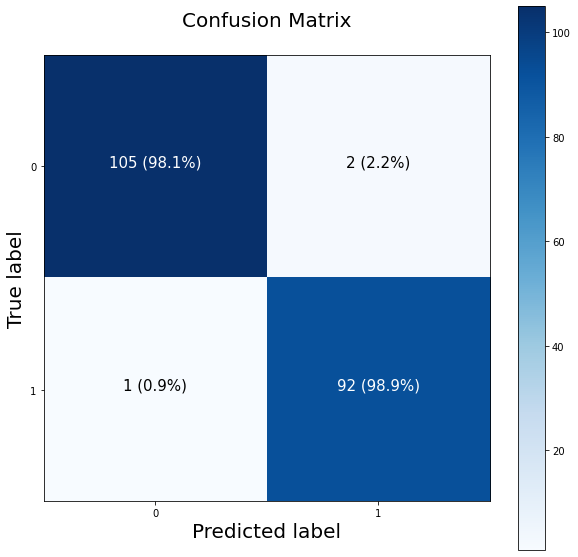

In [ ]:
plot_confusion_matrix(y_test, y_preds)

In [ ]:
model_12.save("/content/drive/MyDrive/ML_Tensor/binary_model.h5")